# Machine learning project 

This project is to build a predictive machine learning model using the customer churn data available at Kaggle website.

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Define custom functions

In [2]:
# pie chart of default:
def check_balance(s, target, style="seaborn-pastel"):
  """ s: a series"""
  s_size = s.value_counts()
  print(s_size)
  plt.figure(figsize=(6,4))
  plt.pie(s_size, autopct='%0.1f%%',explode=[0.05]*len(s_size), labels=s_size.index);
  plt.legend(s.unique(), title=target,loc='upper right');
# plt.show()

# Histogram of discrete variables
def draw_hists(df, features, n_rows=4, n_cols=2):
  fig=plt.figure(figsize=(4*n_cols,3*n_rows))
  for i, feature in enumerate(features):
      ax=fig.add_subplot(n_rows,n_cols,i+1)
      df[feature].hist(bins=10,ax=ax)
      ax.set_title(feature+" Distribution")
  fig.tight_layout()  # Improves appearance a bit.
  # plt.show()
    
# Distribution of numeric variables
def draw_hists_num(df, target,feature):
    def0 = list(df[df[target]=='No'][feature])
    def1 = list(df[df[target]=='Yes'][feature])
    plt.figure(figsize=(12,6))
    plt.hist([def0,def1], bins=20, color=['steelblue', 'lightblue']);
    plt.xlim([min(df[feature]),max(df[feature])])
    plt.legend(sorted(df[target].unique()), title = target, loc='upper right', facecolor='white')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram - ' + target + ' by ' + feature, size=15) 

### Read in data

In [3]:
## Read in data
df0 = pd.read_csv('./data/visathon_train_data.csv')#,index=customer_id)
df0.sample(5)

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
8042,11011.0,1321.0,48.0,Male,2.0,Engineer,Low,1746.0,27.0,3112.88,2907.50,3356.96,8832.44,428.86,0.29,152.06,580.63,3173.22,3268.10,Yes
7463,10196.0,2386.0,45.0,Female,0.0,Engineer,Medium,282.0,63.0,36985.44,37212.30,28597.69,6964.73,0.57,0.57,227.43,0.57,37157.54,37210.59,Yes
10352,14197.0,357.0,19.0,Male,0.0,Doctor,Medium,2666.0,184.0,3945.97,3206.70,3500.87,3324.85,0.33,0.33,3.91,260.29,3906.32,3282.50,Yes
8327,11403.0,6316.0,66.0,Female,0.0,Lawyer,Medium,35.0,14.0,3457.76,4186.74,4484.29,4091.84,786.13,5581.82,1514.70,3924.51,4486.24,4729.70,Yes
13885,19016.0,4414.0,80.0,Female,0.0,Engineer,High,166.0,21.0,NaN,2535.14,2903.27,1325.10,2500.07,357.21,714.36,0.07,4296.22,2419.93,Yes


In [4]:
df = df0.copy()
df.shape

(17654, 20)

## Explore the data

In [250]:
df.describe()

,customer_id,vintage,age,dependents,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,1.693900e+04,1.765400e+04,1.765400e+04,17654.000000,1.765400e+04,1.765400e+04,1.765400e+04,1.676700e+04,1.683800e+04,1.765400e+04
mean,12087.904044,2548.803274,47.963011,0.376629,875.724708,67.044579,7.168881e+03,7.222929e+03,7.194549e+03,6723.439337,3.509008e+03,3.797951e+03,3.812341e+03,3.709473e+03,7.216016e+03,7.194303e+03
std,6987.684541,1599.755612,16.422730,1.063252,903.755183,83.983477,2.055108e+04,2.089998e+04,1.914165e+04,17403.866869,2.849671e+04,3.451301e+04,2.671132e+04,2.472173e+04,1.980531e+04,2.109868e+04
min,1.000000,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03
25%,6017.250000,1320.000000,36.000000,0.000000,158.000000,11.000000,1.778495e+03,1.907295e+03,2.205062e+03,1818.735000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.018862e+03,2.087055e+03
50%,12109.500000,2205.000000,46.000000,0.000000,538.000000,28.000000,3.335280e+03,3.432845e+03,3.590405e+03,3391.805000,9.050000e-01,5.030000e+00,2.146150e+02,2.232700e+02,3.503995e+03,3.505955e+03
75%,18131.750000,3377.750000,60.000000,0.000000,1375.000000,90.000000,6.820100e+03,6.882498e+03,6.868970e+03,6663.795000,9.938550e+02,1.142925e+03,1.582697e+03,1.664615e+03,6.855000e+03,6.810690e+03
max,24212.000000,11353.000000,90.000000,52.000000,4782.000000,365.000000,1.076091e+06,1.001124e+06,1.192704e+06,856596.510000,1.764286e+06,2.361808e+06,1.764286e+06,1.414168e+06,1.074625e+06,1.326487e+06


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     17654 non-null  float64
 1   vintage                         17654 non-null  float64
 2   age                             17654 non-null  float64
 3   gender                          17654 non-null  object 
 4   dependents                      17654 non-null  float64
 5   occupation                      17472 non-null  object 
 6   customer_nw_category            17654 non-null  object 
 7   branch_code                     17654 non-null  float64
 8   days_since_last_transaction     17654 non-null  float64
 9   current_balance                 16939 non-null  float64
 10  previous_month_end_balance      17654 non-null  float64
 11  average_monthly_balance_prevQ   17654 non-null  float64
 12  average_monthly_balance_prevQ2  

In [252]:
## Missing values
df.isna().sum()

customer_id                         0
vintage                             0
age                                 0
gender                              0
dependents                          0
occupation                        182
customer_nw_category                0
branch_code                         0
days_since_last_transaction         0
current_balance                   715
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit              887
current_month_balance             816
previous_month_balance              0
churn                               0
dtype: int64

### Group variables

In [5]:
cat_vars = ['gender', 'dependents', 'occupation','customer_nw_category', 'branch_code']
num_vars = ['vintage', 'age',  'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance']
target = 'churn'

### Distribution - Categorical variables

In [254]:
print('Number of unique values:')
for feature in cat_vars:
    print('{}: {}'.format(feature,len(df[feature].unique())))

Number of unique values:
gender: 2
dependents: 14
occupation: 6
customer_nw_category: 3
branch_code: 2731


In [255]:
df['gender'].value_counts()

Male      10760
Female     6894
Name: gender, dtype: int64

In [256]:
df['occupation'].value_counts()

Engineer      10658
Accountant     4418
Lawyer         1298
Doctor         1081
Chef             17
Name: occupation, dtype: int64

In [257]:
df['dependents'].value_counts()

0.0     14355
2.0      1572
1.0      1025
3.0       533
4.0       127
5.0        26
6.0         7
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
8.0         1
Name: dependents, dtype: int64

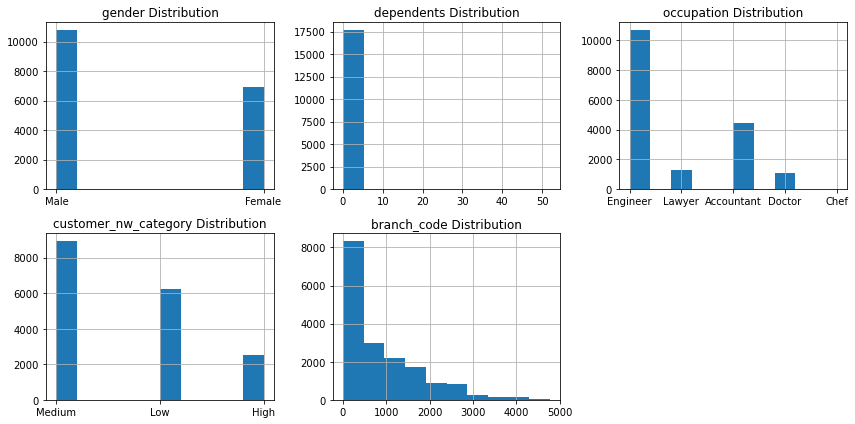

In [258]:
draw_hists(df,cat_vars,2,3)

### Data balance

Yes    14174
No      3480
Name: churn, dtype: int64


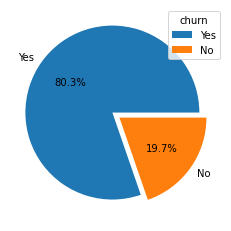

In [259]:
check_balance(df[target],target)

### Distribution - numeric variables

In [260]:
print('Feature \t\t\t count of negatives \t max')
for feature in num_vars:
    if feature in ['vintage']:
        print('{} \t\t\t {} \t\t\t {}'.format(feature, len(df[df[feature]<0]),max(df[feature])))
    elif feature in ['age']:
        print('{} \t\t\t\t {} \t\t\t {}'.format(feature, len(df[df[feature]<0]),max(df[feature])))
    elif feature in ['previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','days_since_last_transaction']:
        print('{} \t {} \t\t\t {}'.format(feature, len(df[df[feature]<0]),max(df[feature])))  
    else:
        print('{} \t\t {} \t\t\t {}'.format(feature, len(df[df[feature]<0]),max(df[feature])))        

Feature 			 count of negatives 	 max
vintage 			 0 			 11353.0
age 				 0 			 90.0
days_since_last_transaction 	 0 			 365.0
current_balance 		 11 			 1076091.29
previous_month_end_balance 	 6 			 1001123.73
average_monthly_balance_prevQ 	 0 			 1192704.04
average_monthly_balance_prevQ2 	 16 			 856596.51
current_month_credit 		 0 			 1764285.97
previous_month_credit 		 0 			 2361808.29
current_month_debit 		 0 			 1764285.97
previous_month_debit 		 0 			 nan
current_month_balance 		 5 			 1074624.64
previous_month_balance 		 4 			 1326486.64


#### Columns with negative values

In [261]:
df[(df[num_vars]<0).any(1)]

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1067,1470.0,2867.0,69.0,Female,0.0,Lawyer,Medium,54.0,77.0,-5213.02,26616.49,8067.56,657.16,0.43,0.43,3229.00,0.43,-3374.18,26616.49,Yes
1527,2116.0,889.0,69.0,Male,0.0,Lawyer,Medium,3878.0,28.0,-3786.47,9397.57,4314.75,280.51,939.27,9688.23,14538.27,681.01,7064.58,5621.40,No
3699,5040.0,2097.0,41.0,Female,0.0,Engineer,Medium,578.0,6.0,3318.03,3032.32,3095.88,-643.84,500.10,500.10,714.39,91.96,NaN,3067.22,Yes
3807,5196.0,4160.0,90.0,Male,0.0,Engineer,High,1.0,20.0,5111.14,5000.18,2121.77,-4933.16,28571.94,15603.67,21429.09,10754.99,5101.17,2907.78,Yes
4211,5733.0,2497.0,43.0,Female,0.0,Engineer,High,6.0,24.0,-91.63,6861.92,5670.90,4706.78,516.24,516.24,7469.63,0.31,3998.05,6740.59,Yes
6828,9317.0,5757.0,55.0,Male,0.0,Engineer,Low,1809.0,13.0,NaN,19176.78,17680.49,-7209.85,316.89,637.27,8740.23,1428.80,16974.99,19436.77,No
6974,9510.0,2349.0,38.0,Female,0.0,Engineer,Low,1440.0,121.0,NaN,198.70,1656.48,-16506.10,0.33,0.33,0.33,0.33,376.78,198.70,No
7100,9680.0,5037.0,45.0,Male,0.0,Engineer,High,60.0,4.0,182810.99,93251.82,63279.58,-5714.08,512.54,5982.79,0.27,19575.54,154423.84,33942.74,Yes
7340,10023.0,4046.0,42.0,Male,2.0,Engineer,High,424.0,9.0,30027.04,34686.98,18775.49,-4290.90,16004.26,93538.19,10189.96,89204.41,37183.85,16177.17,Yes
9209,12634.0,997.0,54.0,Female,0.0,Engineer,High,1216.0,21.0,-2287.98,-2178.74,4663.46,2416.97,1.01,384.46,88.53,2190.16,-2227.29,-1696.24,No


#### Distributions by churn

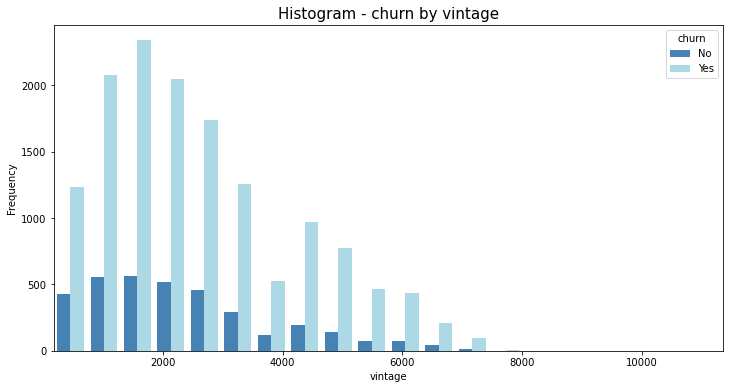

In [344]:
draw_hists_num(df, target,'vintage')

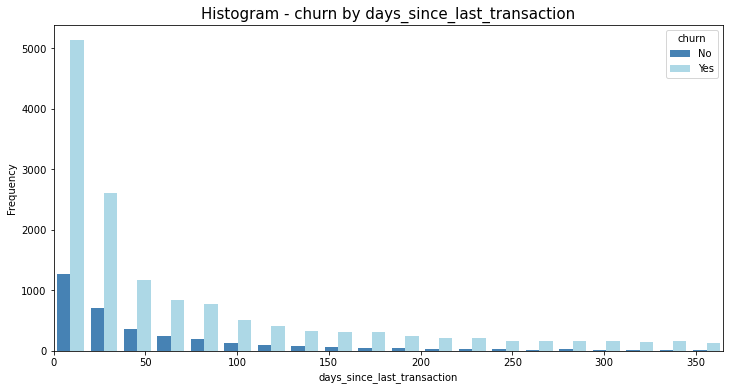

In [334]:
draw_hists_num(df, target,'days_since_last_transaction')

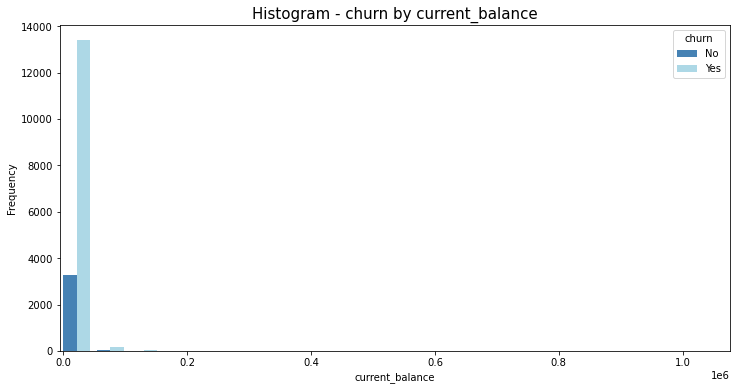

In [341]:
draw_hists_num(df, target,'current_balance')

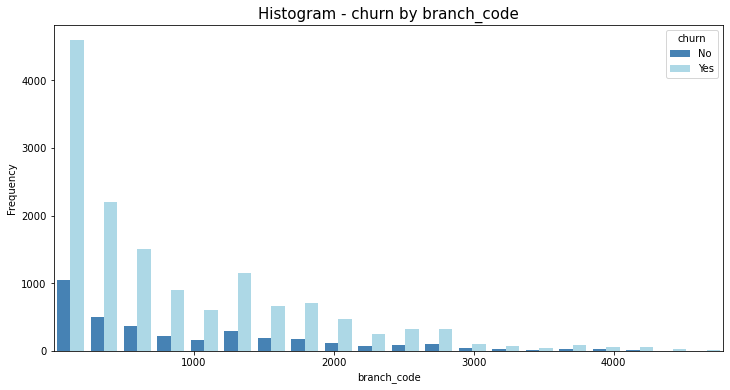

In [336]:
draw_hists_num(df, target,'branch_code')

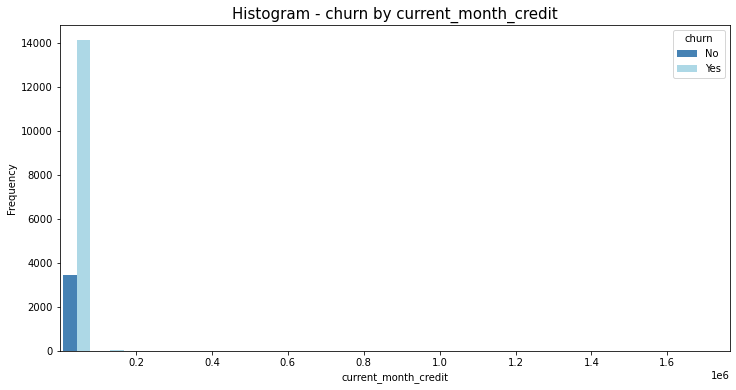

In [339]:
draw_hists_num(df, target, 'current_month_credit')

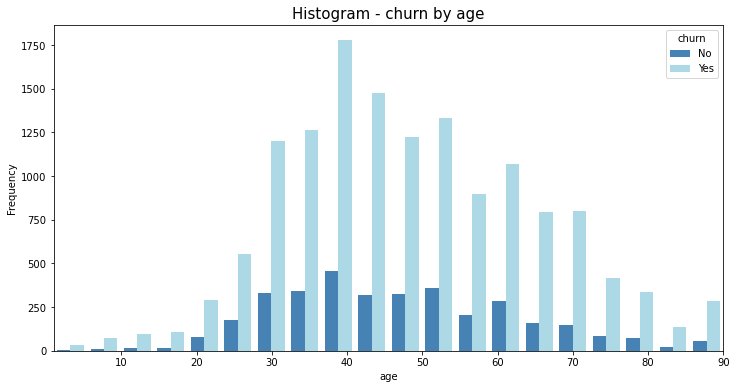

In [340]:
draw_hists_num(df, target, 'age')

In [10]:
df.loc[:,[target]+cat_vars]

,churn,gender,dependents,occupation,customer_nw_category,branch_code
0,Yes,Male,0.0,Engineer,Medium,755.0
1,No,Male,2.0,Engineer,Low,388.0
2,Yes,Female,0.0,Engineer,Medium,1666.0
3,Yes,Male,0.0,Lawyer,High,1.0
4,Yes,Male,0.0,Engineer,Medium,317.0
...,...,...,...,...,...,...
17649,Yes,Female,0.0,Engineer,Medium,275.0
17650,Yes,Male,0.0,Engineer,Low,1415.0
17651,Yes,Female,0.0,Engineer,Medium,2545.0
17652,Yes,Female,0.0,Engineer,Low,140.0


### Pairplots for paired relationships

In [29]:
df1 = df0.copy()
df1['occupation'] = [0 if occ=='Accountant' else 1 if occ=='Chef' else 2 if occ=='Doctor' else 3 if occ=='Engineer' 
                     else 4 if occ=='Lawyer' else 5 for occ in df1['occupation']]
df1['customer_nw_category'] = [0 if nw=='Low' else 1 if nw=='Medium' else 3 for nw in df1['customer_nw_category']]
df1['gender'] = [0 if gender=='Male' else 1 for gender in df1['gender']]

<Figure size 576x720 with 0 Axes>

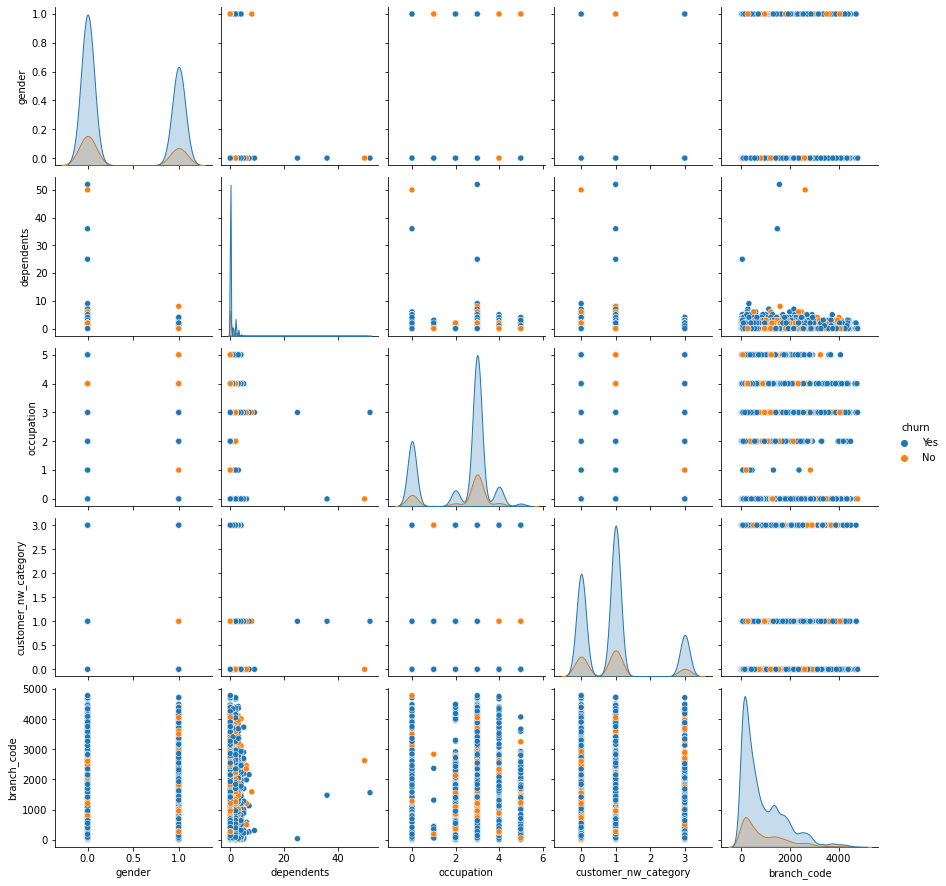

In [37]:
plt.figure(figsize=(8,10))
sns.pairplot(df1.loc[:,[target]+cat_vars],hue=target);

<Figure size 576x720 with 0 Axes>

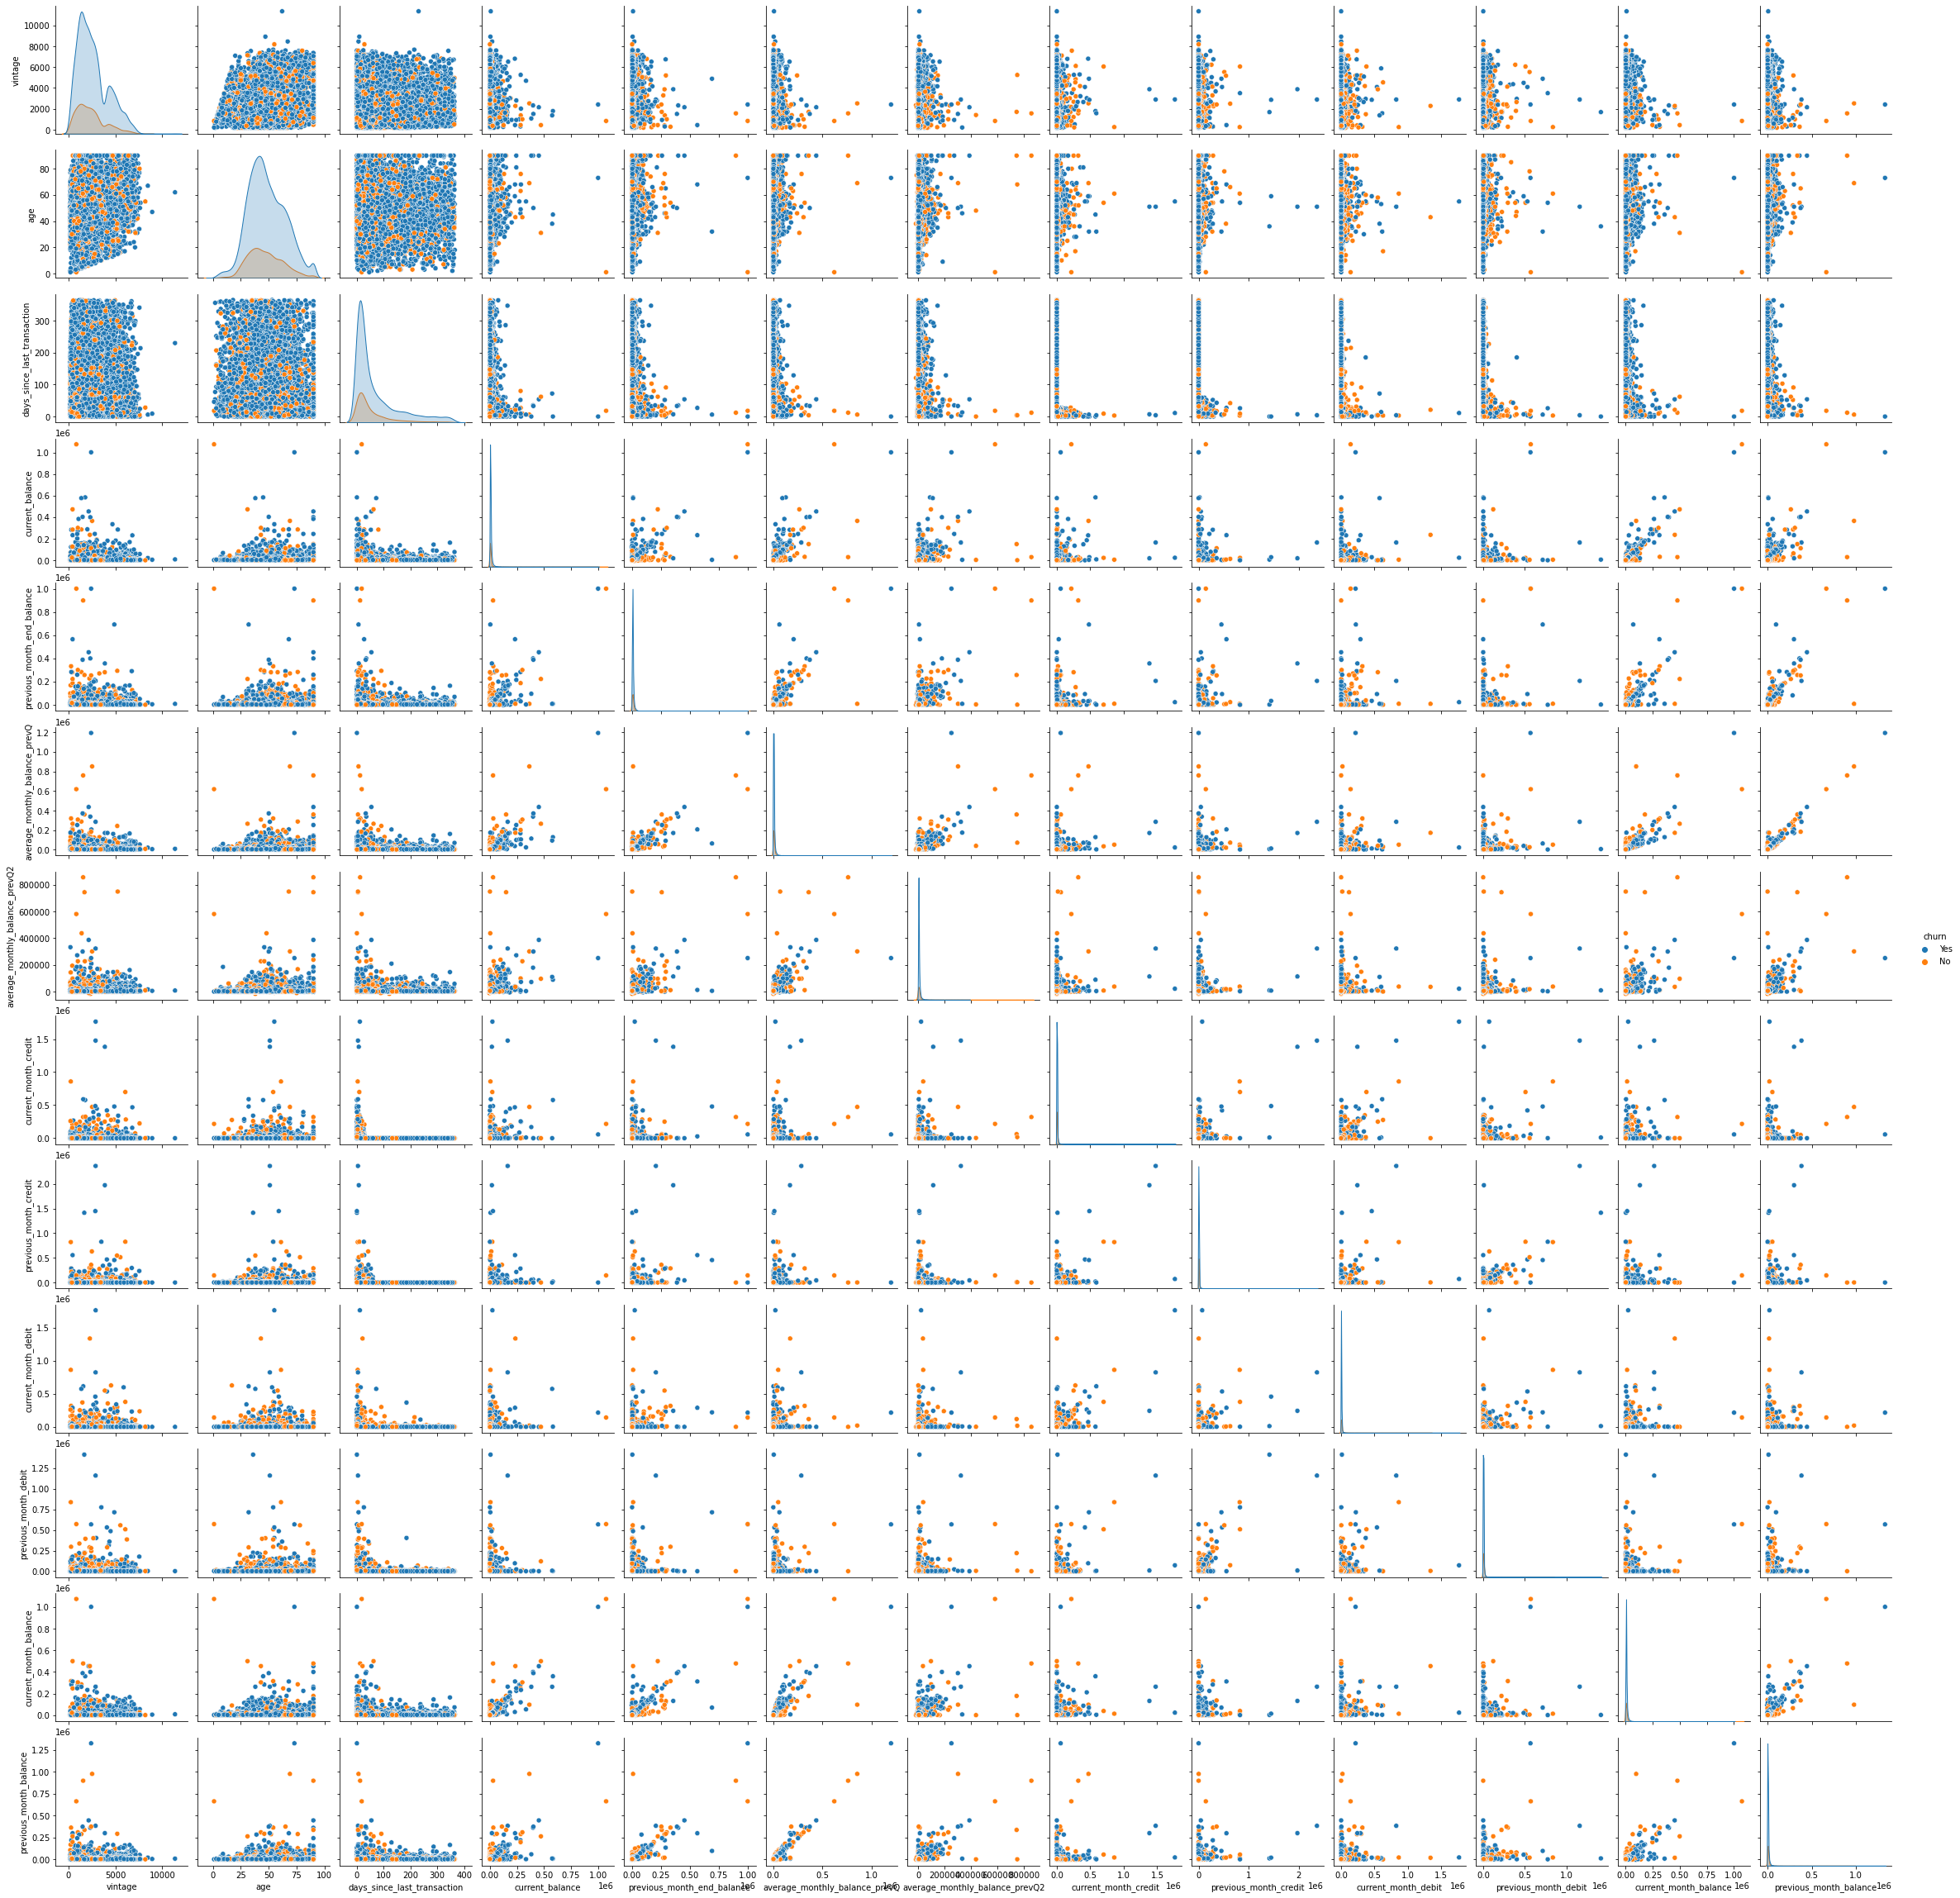

In [38]:
plt.figure(figsize=(8,10))
sns.pairplot(df1.loc[:,[target]+num_vars],hue=target);

### Heatmap - all variables

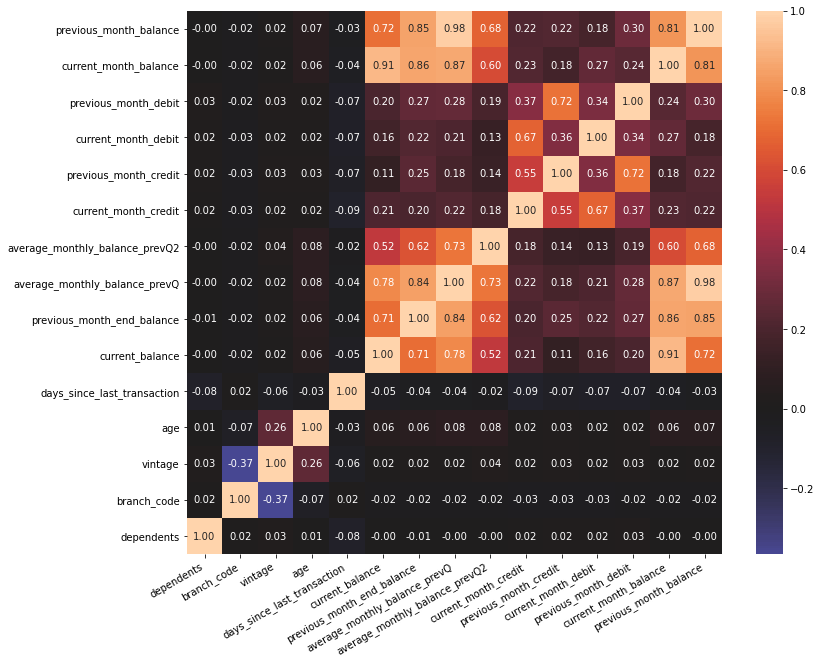

In [269]:
corr_mat = df[[target]+cat_vars+num_vars].corr()
# corr_mat = np.triu(corr_mat) # get the upper triangle of th ematrix (not working)
# cmap = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(12,10))
p = sns.heatmap(corr_mat,annot=True, fmt='.2f',center=0);#,cmap=cmap)
p.invert_yaxis()
plt.xticks(rotation=30,ha='right') ;

As shown in the heatmap and pairplots, balance features are correlated, so do credit and debit features. Also vintage ar correlated to branch_code and age, but much weaker.

### Check outliers with boxplot

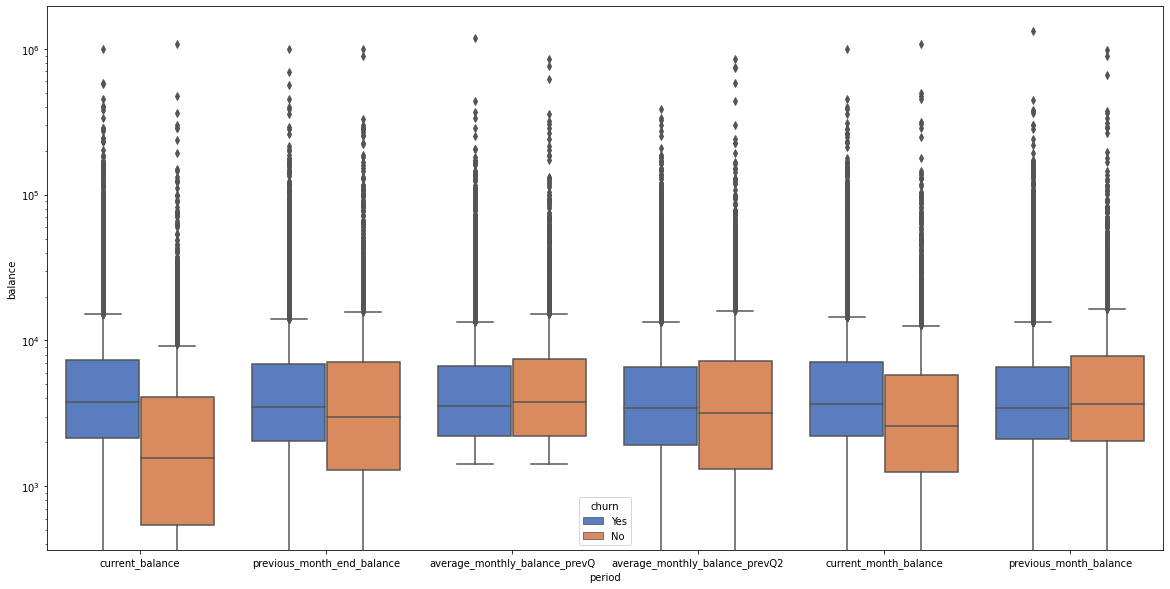

In [270]:
# balance
df_balance = df[[target,'current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_balance',
       'previous_month_balance']]
df_balance = pd.melt(df_balance,id_vars=target,
                    var_name="period",
                    value_name='balance')

plt.figure(figsize=(20,10))
p = sns.boxplot(x='period',y='balance', hue=target, data=df_balance, palette="muted");
p.set_yscale("log")

In [143]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

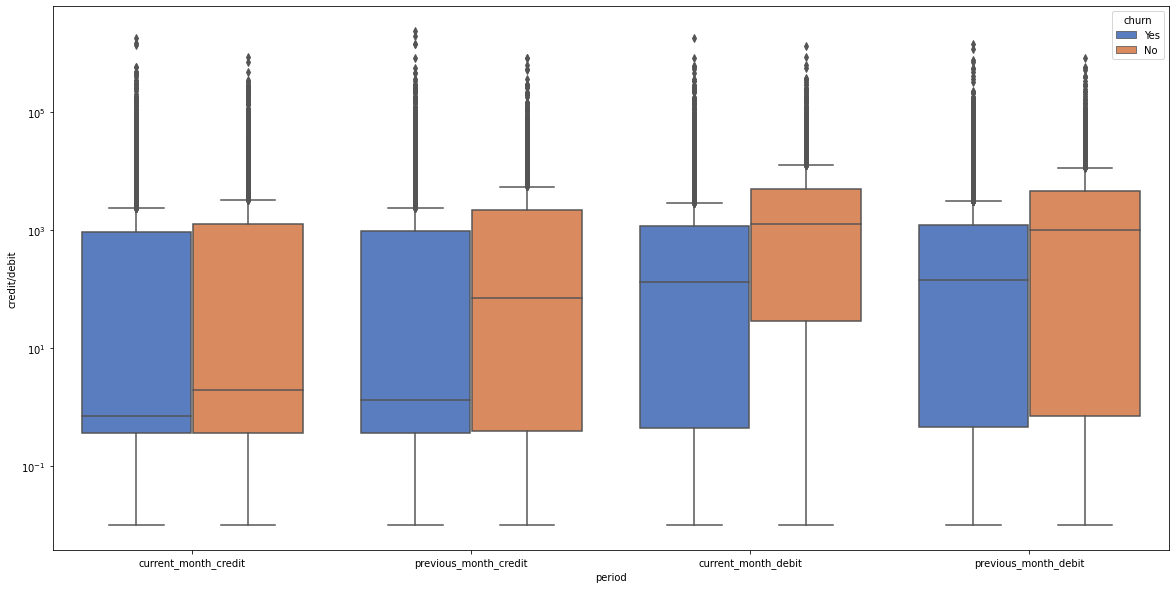

In [271]:
# credit and debit
df_debtcredit = df[[target,'current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']]
df_debtcredit = pd.melt(df_debtcredit,id_vars=target,
                    var_name="period",
                    value_name='credit/debit')

plt.figure(figsize=(20,10))
p = sns.boxplot(x='period', y='credit/debit', hue=target, data=df_debtcredit, palette="muted");
p.set_yscale("log")

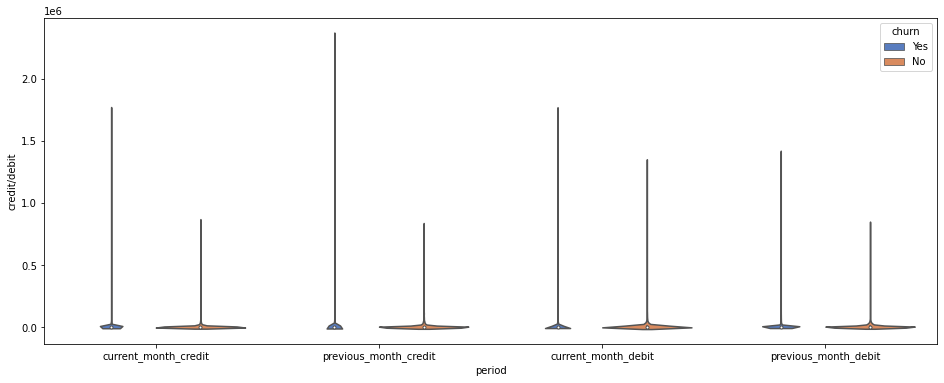

In [272]:
fig = plt.figure(figsize=(16,6))
p = sns.violinplot(x='period',y=df_debtcredit['credit/debit'],hue=target, data=df_debtcredit, palette="muted");
# p.set_yscale("log")

## Looking into missing values

Features with missing values:

In [273]:
df.isna().sum()

customer_id                         0
vintage                             0
age                                 0
gender                              0
dependents                          0
occupation                        182
customer_nw_category                0
branch_code                         0
days_since_last_transaction         0
current_balance                   715
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit              887
current_month_balance             816
previous_month_balance              0
churn                               0
dtype: int64

As shown, 4 features contain missing values: occupation, current_balance, previous_month_debit, and current_month_balance. <br>

For occupation, we will create an additional occupation for the missing values as 'other'. This is reasonable since there are many types of occupations but no certain ways that we would be able to assign the occupations. <br>

For other features, there are two ways of filling in missing values: <br>
    -- One way is to infer from the known values of the other features. For example, for the currrent_balance and current_month_balance, we could use the average of other balance features, and for the previous_month_debit, we could simply use aurrent_month_debit, then add a random value. The advantage of this method is that the filled values are in line with the balance (or spending) ranges. <br>
    -- The other way could be to use the median value of each group (gender and occupation). It is possible that the imputed values be off the chart (not in line with a specific customers spending behavior), but we certainly do not know if that would be the case.
     WE decided to go with way one, i.e., use the average of avaibale feature values.

In [324]:
## Two or more values missing for the same customer
a2 = df[df[['current_balance','previous_month_debit']].isna().all(1)].isna().sum()
a3 = df[df[['current_balance','current_month_balance']].isna().all(1)].isna().sum()
a4 = df[df[['previous_month_debit','current_month_balance']].isna().all(1)].isna().sum()
a5 = df[df[['current_balance','previous_month_debit','current_month_balance']].isna().all(1)].isna().sum()
pd.DataFrame([a2,a3,a4,a5]).T

,0,1,2,3
customer_id,0,0,0,0
vintage,0,0,0,0
age,0,0,0,0
gender,0,0,0,0
dependents,0,0,0,0
occupation,0,0,1,0
customer_nw_category,0,0,0,0
branch_code,0,0,0,0
days_since_last_transaction,0,0,0,0
current_balance,34,28,0,0


The above output shows the counts of the occurances where values of two or more features are missing for the same customers. For example, 28 customers do not have current_balance value nor current_month_balance value.

## Looking into low frequncy categories

Some categories in categorical features have very low occurrence, for example, feature dependents have 16 categories, and 6 of them occur only once. We will group the categories with less than 10 occurrences into one category.

In [329]:
df['dependents'].value_counts()

0.0     14355
2.0      1572
1.0      1025
3.0       533
4.0       127
5.0        26
6.0         7
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
8.0         1
Name: dependents, dtype: int64

## Next step

Next step is to transform the data and build a pipeline for machine learning models.